# The objective of this notebook is to find a way to show the results over a the base map

In [1]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import rasterio

In [2]:
# Artificial import of results comming from The notebook 16.0
t2fresults = np.array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5,
       3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5,
       5, 5, 3, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [3]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

In [2]:
PATH_IMAGE = "../data/cropped/cropped_crop_SENTINEL2B_20231007-105728-915_L2A_T31UDQ_C_V3-1.tif"


In [3]:
src = rasterio.open(PATH_IMAGE)
red = src.read(2)
green = src.read(3)
blue = src.read(4)
nri = src.read(1)

print(red.min())
print(red.max())

0
4142


In [6]:
red.shape, green.shape, blue.shape, nri.shape

((973, 2182), (973, 2182), (973, 2182), (973, 2182))

In [7]:
red.shape[0]

973

In [8]:
from matplotlib import colors

# Define the colors for the classes
class_colors = ['r', 'g', 'b', 'y', 'm', 'c', 'orange', 'purple', 'pink', 'brown',
                'lime', 'teal', 'olive', 'navy', 'maroon', 'aqua', 'fuchsia', 'silver',
                'gray', 'black', 'indigo', 'coral', 'gold', 'darkgreen', 'darkblue',
                'darkred', 'darkorange', 'darkviolet', 'darkgray', 'lightgray']

# Create the discrete color map
cookie_map = colors.ListedColormap(class_colors[:30])
# create a color map discrete for 30 classes


In [9]:
red.shape

(973, 2182)

In [10]:
plt.rcParams['figure.dpi']

100.0

In [11]:
# redn = (red/6).astype(int)
# greenn = (green/6).astype(int)
# bluen = (blue/6).astype(int)
# nirn = (nri/6).astype(int)
# px = 1/plt.rcParams['figure.dpi'] 
# # Create RGB natural color composite
# rgb = np.dstack((redn, greenn, bluen))
# # Create the results matrix
# results = np.zeros((rgb.shape[0],rgb.shape[1]))
# for i in range(0, len(pixels_de_interet)):
#     results[pixels_de_interet[i][0], pixels_de_interet[i][1]] = t2fresults[i]+1
# # changes 0 to nan
# results[results == 0] = np.nan

# cookie_map = colors.ListedColormap(class_colors[:len(np.unique(t2fresults))])

# # Let's see how our color composite looks like
# plt.figure(figsize=(100, 100))
# ax = plt.gca()
# im = ax.imshow(rgb, alpha=0.3)
# clusters = ax.imshow(results, cmap=cookie_map)
# # plt.imshow(rgb, alpha=0.3)
# # plt.imshow(results, cmap='tab10')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="2%", pad=0.2)
# plt.colorbar(clusters, cax=cax)
# plt.show()

## Triying the compact implementation from cookie_clusters

In [12]:
from cookie_clusters import afficheur_de_resultats

In [13]:
results = afficheur_de_resultats(PATH_IMAGE, t2fresults, pixels_de_interet)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


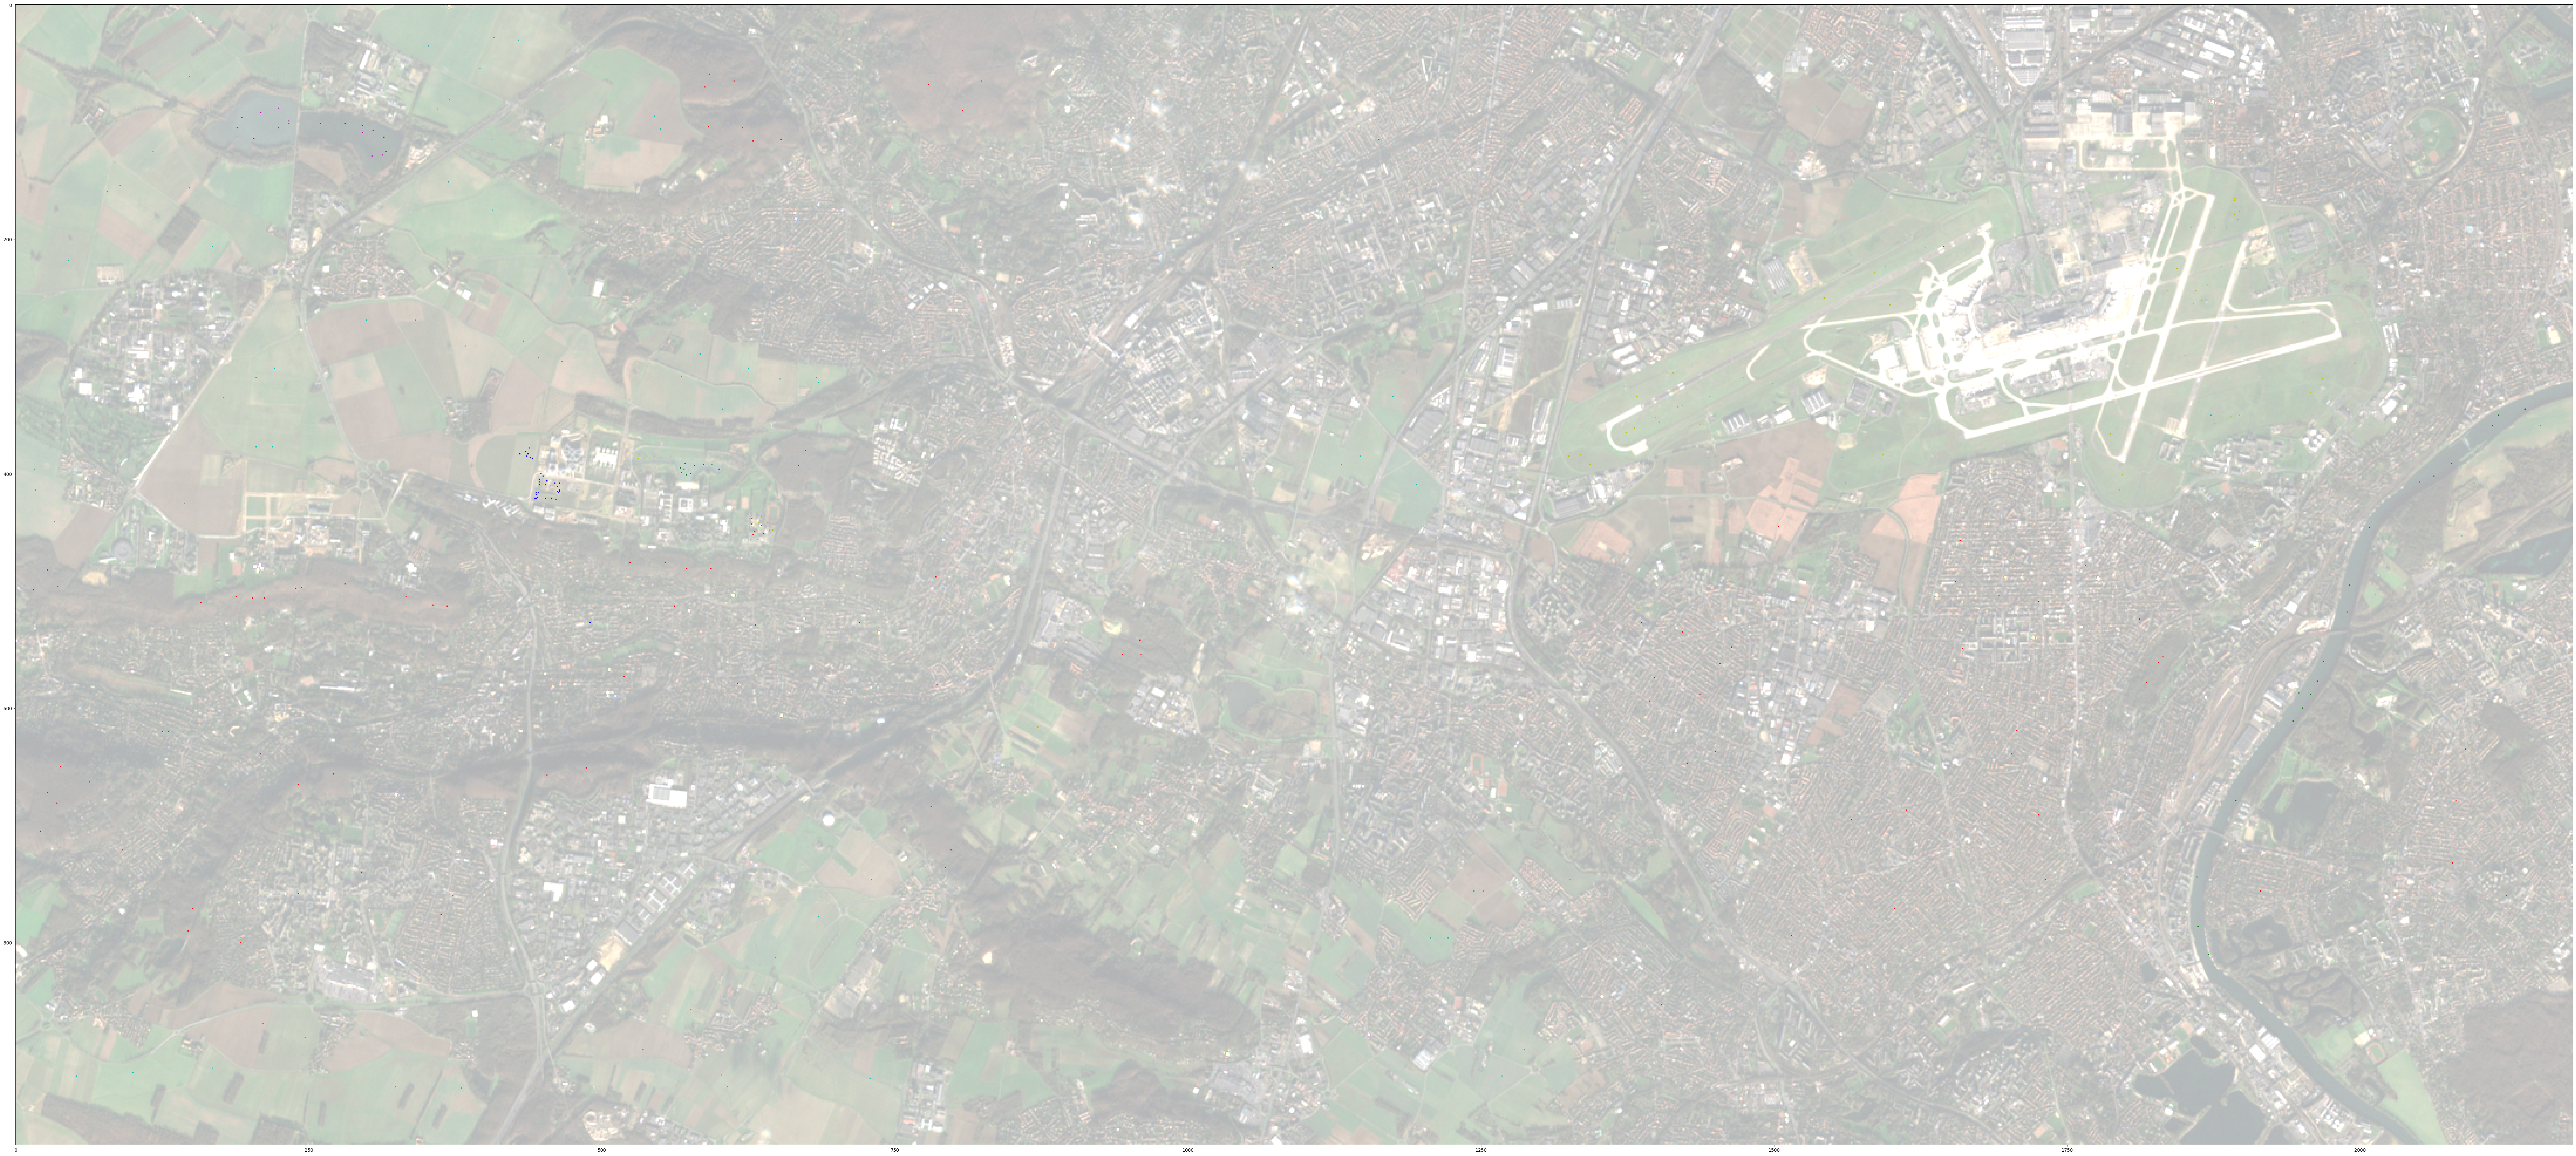

In [16]:
results.create_image('../results/cluster_results.jpg', False)

## Creating a base image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


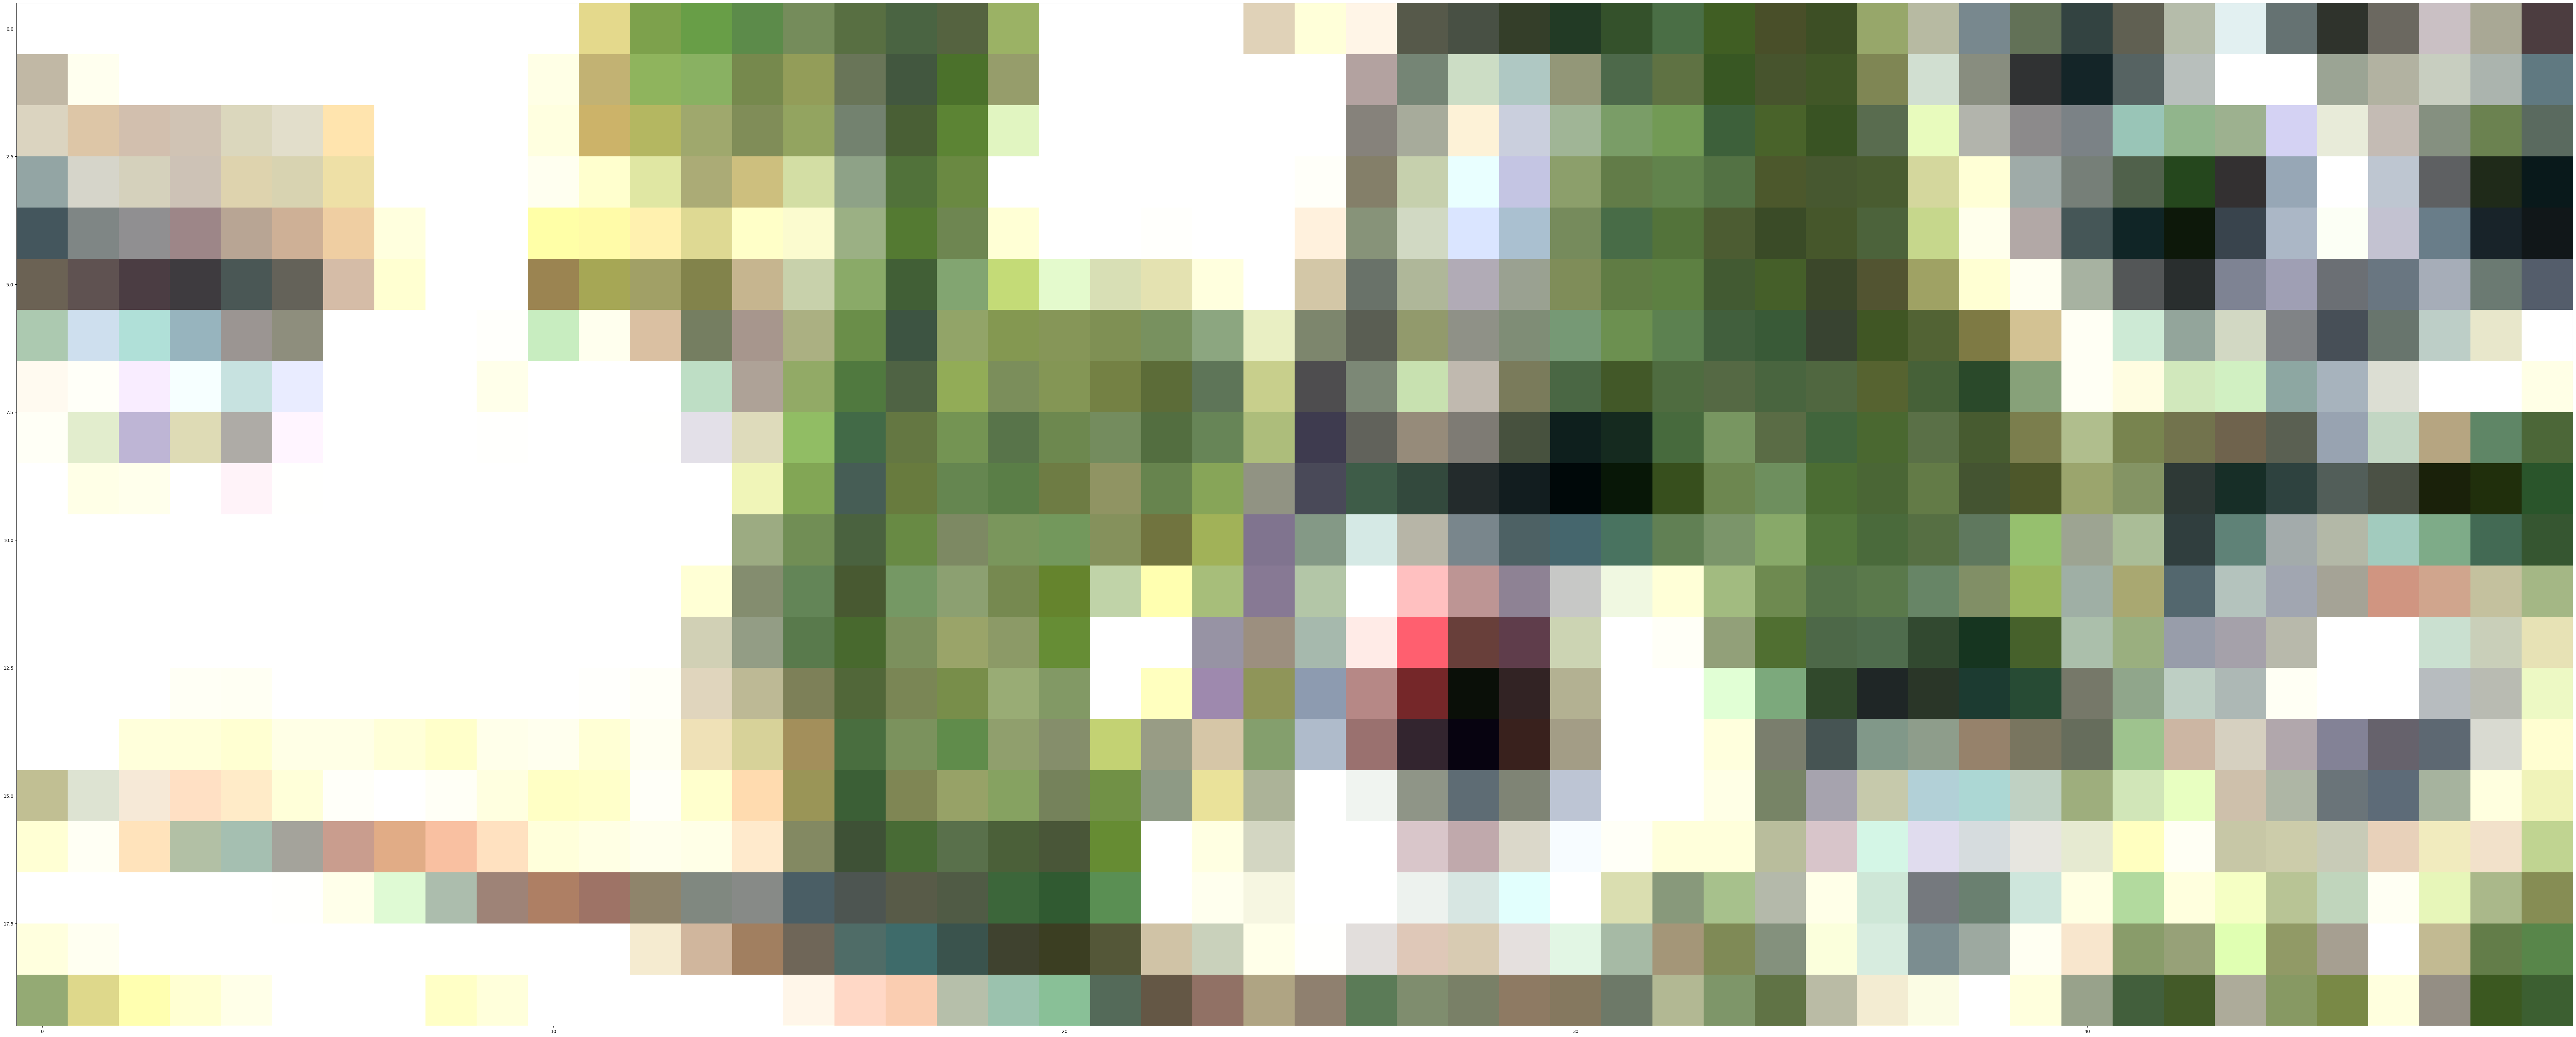

In [4]:
redn = (red/6).astype(int)
greenn = (green/6).astype(int)
bluen = (blue/6).astype(int)
nirn = (nri/6).astype(int)
# Create RGB natural color composite
rgb = np.dstack((redn, greenn, bluen))

plt.figure(figsize=(100, 100))
plt.imshow(rgb)
plt.savefig('../results/base_image_last.jpg', bbox_inches="tight")